In [2]:
import keras
from keras import models, layers
from keras import datasets
from keras.utils import np_utils # one hot encdoing -- torch.max 부분 대체
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 1. Data Loading
(X_train, y_train),(X_test, y_test) = datasets.fashion_mnist.load_data()

In [5]:
print(X_train[0].shape)
print(X_train.shape)
print(y_train.shape)

img_rows, img_cols = X_train.shape[1:]
print(img_rows)
print(img_cols)

(28, 28)
(60000, 28, 28)
(60000,)
28
28


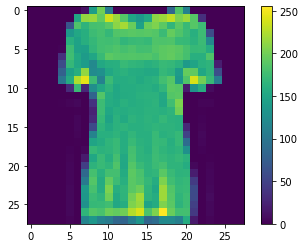

In [6]:
plt.figure()
plt.imshow(X_train[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
# keras에서 채널은 어디에 있는가
X_train.shape
from keras import backend

# 뒤에 있다

In [8]:
# 2-1. preprocessing : scaling
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [9]:
from keras import backend

if backend.image_data_format == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0],1,28,28) # 채널이 빠졌기에 넣기
    X_test = X_test.reshape(X_test.shape[0],1,28,28)
    input_shape = (1,img_rows,img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0],img_rows,img_rows,1)
    X_test = X_test.reshape(X_test.shape[0],img_rows,img_rows,1)
    input_shape = (img_rows,img_cols,1)

In [10]:
# 2-2. preprocessing : one-hot-encoding
num_classes=100
Y_train=np_utils.to_categorical(y_train, num_classes)
Y_test=np_utils.to_categorical(y_test,num_classes)

Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

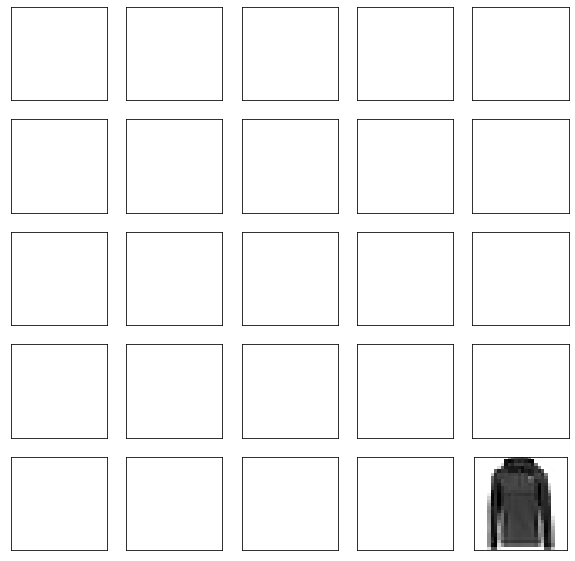

In [11]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.binary)

In [29]:
# 3. Model 생성
model = models.Sequential()

In [30]:
model.add(layers.Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(28,28,1))) # 출력 노드,필터크기, ..
model.add(layers.Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten()) # FCN 전에 flatten
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation='softmax'))

model.summary() # 구조 나옴


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               921700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)             

In [31]:
# 4. complie
model.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# 5.학습
model.fit(X_train, Y_train, epochs=20,batch_size=100)

In [47]:
# 시각화
# fit 트레이닝할 때 로그 메세지들을 다 모아서 리턴 == history
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['training', 'validation'])
    plt.savefig('../../../kjy/Loss_plt.png',dpi=300) # 이 그래프를 Tompcat 경로로 잡으면 됨... 이미지
    plt.show()

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model acc')
    plt.xlabel('Epoch')
    plt.ylabel('acc')
    plt.legend(['training', 'validation'])
    plt.savefig('../../../kjy/ACC_plt.png',dpi=300) # 이 그래프를 Tompcat 경로로 잡으면 됨... 이미지
    plt.show()

In [48]:
history = model.fit(X_train,Y_train, epochs=10, batch_size = 100, validation_split= 0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 84s 2ms/step - loss: 2.4732 - accuracy: 0.0983 - val_loss: 2.3061 - val_accuracy: 0.1013
Epoch 2/10
48000/48000 [==============================] - 89s 2ms/step - loss: 2.3173 - accuracy: 0.0998 - val_loss: 2.3075 - val_accuracy: 0.1005
Epoch 3/10
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3102 - accuracy: 0.0971 - val_loss: 2.3050 - val_accuracy: 0.1013
Epoch 4/10
48000/48000 [==============================] - 98s 2ms/step - loss: 2.3076 - accuracy: 0.0995 - val_loss: 2.3046 - val_accuracy: 0.0995
Epoch 5/10
48000/48000 [==============================] - 82s 2ms/step - loss: 2.3068 - accuracy: 0.0993 - val_loss: 2.3067 - val_accuracy: 0.0957
Epoch 6/10
48000/48000 [==============================] - 82s 2ms/step - loss: 2.3068 - accuracy: 0.0973 - val_loss: 2.3032 - val_accuracy: 0.1027
Epoch 7/10
28700/48000 [================>.............] - ETA: 30s 

KeyboardInterrupt: 

In [ ]:
plot_loss(history)

In [ ]:
plot_acc(history)

In [ ]:
# 6. 평가
model_eval = model.evaluate(X_test,Y_test, batch_size=100)
print('Loss : {}, Accuracy : {}' .format(*model_eval))

In [ ]:
model.save('C://kjy/fashion_mnist.h5')